In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('dark_background')

from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.datasets import cifar10
from keras.utils import normalize, to_categorical

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [3]:
train_datagen = ImageDataGenerator(
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

train_datagen.fit(X_train)

train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size = 32
)

In [4]:
steps = int(X_train.shape[0] / 64)
steps

781

In [5]:
def build_model(batch_normalization, activation):
    model = Sequential()
    model.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (32, 32, 3)))
    if batch_normalization: model.add(BatchNormalization())
    model.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
    if batch_normalization: model.add(BatchNormalization())
    model.add(MaxPooling2D())
    model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
    if batch_normalization: model.add(BatchNormalization())
    model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
    if batch_normalization: model.add(BatchNormalization()) 
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dense(128, activation = activation, kernel_initializer = 'he_uniform'))
    model.add(Dense(10, activation = 'softmax'))

    return model

In [6]:
sig_model = build_model(batch_normalization = False, activation = 'sigmoid')

In [7]:
sig_model.compile(
    optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [8]:
sig_history = sig_model.fit_generator(
        train_generator,
        steps_per_epoch = steps,
        epochs = 10,
        validation_data = (X_test, y_test)
)

Epoch 1/10
781/781 [==============================] - 21s 27ms/step - loss: 2.3240 - acc: 0.0979 - val_loss: 2.3103 - val_acc: 0.1000
Epoch 2/10
781/781 [==============================] - 19s 25ms/step - loss: 2.3114 - acc: 0.1018 - val_loss: 2.3141 - val_acc: 0.1000
Epoch 3/10
781/781 [==============================] - 19s 25ms/step - loss: 2.3110 - acc: 0.1026 - val_loss: 2.3087 - val_acc: 0.1000
Epoch 4/10
781/781 [==============================] - 19s 25ms/step - loss: 2.3112 - acc: 0.1052 - val_loss: 2.3066 - val_acc: 0.1000
Epoch 5/10
781/781 [==============================] - 19s 25ms/step - loss: 2.3111 - acc: 0.0984 - val_loss: 2.3080 - val_acc: 0.1000
Epoch 6/10
781/781 [==============================] - 19s 25ms/step - loss: 2.3115 - acc: 0.0994 - val_loss: 2.3076 - val_acc: 0.1000
Epoch 7/10
781/781 [==============================] - 19s 25ms/step - loss: 2.3057 - acc: 0.1005 - val_loss: 2.3072 - val_acc: 0.1000
Epoch 8/10
781/781 [==============================] - 19s 25ms

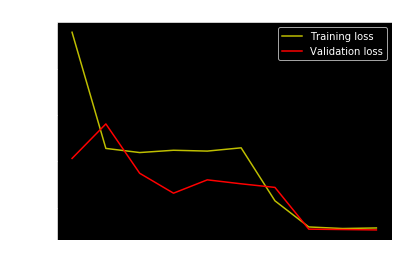

In [9]:
loss = sig_history.history['loss']
val_loss = sig_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

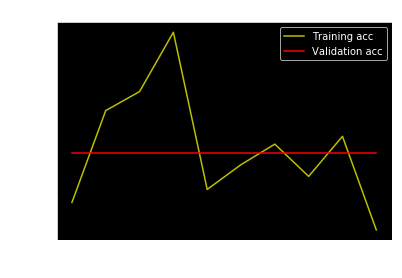

In [10]:
acc = sig_history.history['acc']
val_acc = sig_history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
sig_norm_model = build_model(batch_normalization = True, activation = 'sigmoid')

In [15]:
sig_norm_model.compile(
    optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [16]:
sig_norm_history = sig_norm_model.fit_generator(
        train_generator,
        steps_per_epoch = steps,
        epochs = 10,
        validation_data = (X_test, y_test)
)

Epoch 1/10
781/781 [==============================] - 28s 36ms/step - loss: 1.5985 - acc: 0.4312 - val_loss: 1.5828 - val_acc: 0.4401
Epoch 2/10
781/781 [==============================] - 28s 35ms/step - loss: 1.2381 - acc: 0.5663 - val_loss: 1.9271 - val_acc: 0.3653
Epoch 3/10
781/781 [==============================] - 28s 36ms/step - loss: 1.0906 - acc: 0.6133 - val_loss: 1.4358 - val_acc: 0.5118
Epoch 4/10
781/781 [==============================] - 28s 36ms/step - loss: 1.0293 - acc: 0.6408 - val_loss: 1.2197 - val_acc: 0.5679
Epoch 5/10
781/781 [==============================] - 28s 35ms/step - loss: 0.9593 - acc: 0.6632 - val_loss: 1.1033 - val_acc: 0.6234
Epoch 6/10
781/781 [==============================] - 28s 35ms/step - loss: 0.9430 - acc: 0.6710 - val_loss: 1.4433 - val_acc: 0.5280
Epoch 7/10
781/781 [==============================] - 28s 36ms/step - loss: 0.9078 - acc: 0.6810 - val_loss: 1.3551 - val_acc: 0.5677
Epoch 8/10
781/781 [==============================] - 28s 35ms

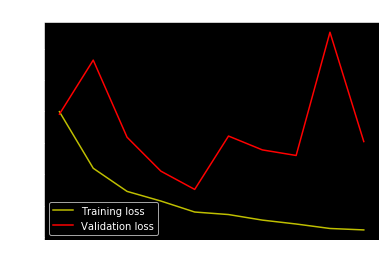

In [19]:
loss = sig_norm_history.history['loss']
val_loss = sig_norm_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

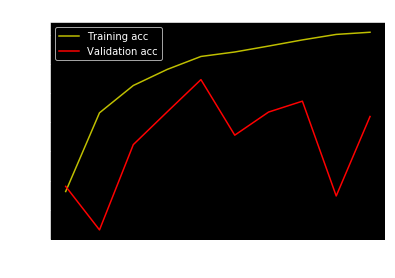

In [20]:
acc = sig_norm_history.history['acc']
val_acc = sig_norm_history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()